In [11]:
# for manipulating the PDF
import fitz

# for OCR using PyTesseract
import re
import cv2                              # pre-processing images
import math
import json
from collections import OrderedDict
import pandas as pd
import pytesseract                      # extracting text from images
import numpy as np
import warnings
import matplotlib.pyplot as plt         # displaying output images

warnings.filterwarnings("ignore")
from PIL import Image

In [12]:
with open('ex1.txt') as f:
    lines = f.readlines()

In [13]:
dataDict = {}
for i,line in enumerate(lines):
    lineDict = json.loads(line)
    dataDict[i] = lineDict

In [14]:
trackerDict = {}
j = 0
for i in range(len(dataDict)):
    if(dataDict[i]['category'] == 'tracker'):
        trackerDict[j] = dataDict[i]
        j += 1

In [15]:
len(trackerDict)

1266

In [16]:
fixationDict = {}
j = 0
for i in range(len(trackerDict)):
    if(trackerDict[i]['values']['frame']['fix'] == True):
        fixationDict[j] = trackerDict[i]
        j += 1

In [17]:
eyeTrackdf = pd.DataFrame( columns=list('xy'))

In [18]:
for i in range(len(fixationDict)):
    x = fixationDict[i]['values']['frame']['raw']['x']
    y = fixationDict[i]['values']['frame']['raw']['y']   
    eyeTrackdf = eyeTrackdf.append({'x':x,'y':y}, ignore_index=True) 

In [19]:
xFixation = pd.DataFrame(eyeTrackdf['x'])
yFixation = pd.DataFrame(eyeTrackdf['y'])

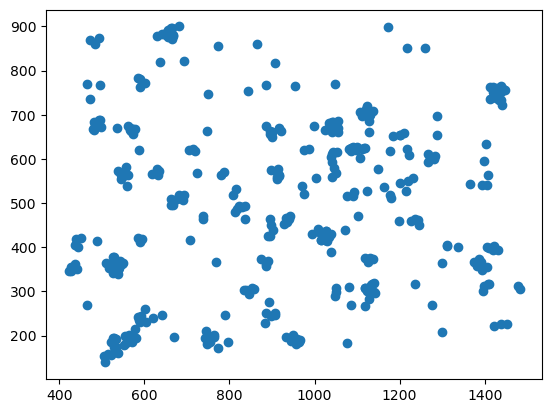

In [20]:
plt.scatter(xFixation,yFixation)

In [27]:
eyeTrackdf

,x,y
0,898.4125,450.8561
1,901.6273,438.0020
2,894.5343,464.1083
3,779.4460,564.5211
4,969.8185,538.7805
...,...,...
390,1024.2583,664.6625
391,1040.0168,661.1179
392,1041.6265,672.4689
393,1039.7925,678.1235


In [26]:
original_image = cv2.imread('french.png')
# convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# Performing OTSU threshold
ret, threshold_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

rectangular_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 12))

# Applying dilation on the threshold image
dilated_image = cv2.dilate(threshold_image, rectangular_kernel, iterations = 1)
#plt.figure(figsize=(25, 15))
#plt.imshow(dilated_image)
#plt.show()

# Finding contours
contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Creating a copy of the image
copied_image = original_image.copy()

with open("out//recognized-kernel-66-66.txt", "w+") as f:
    f.write("")
f.close()

mask = np.zeros(original_image.shape, np.uint8)
 
# Looping through the identified contours
# Then rectangular part is cropped and passed on to pytesseract
# pytesseract extracts the text inside each contours
# Extracted text is then written into a text file
paragraph = ""
bag_of_words = {}
print(len(contours))
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    # Cropping the text block for giving input to OCR
    cropped = copied_image[y:y + h, x:x + w]
    cv2.rectangle(copied_image, (x, y), (x + w, y + h), (36,255,12), 2)
    
    with open("out//recognized-kernel-66-66.txt", "a") as f:
        # Apply OCR on the cropped image
        text = pytesseract.image_to_string(cropped, lang='eng', config='--oem 3 --psm 1')
        text = text.lower()
        text = re.sub('[^a-z]', ' ', text)
        text = re.sub(r'\s+', '', text)
        
        insideCond = (eyeTrackdf["x"] >= x) & (eyeTrackdf["x"] < x + w) & (eyeTrackdf["y"] >= y) & (eyeTrackdf["y"] < y + h)
        boundFixations = eyeTrackdf[insideCond]
        for fixation in boundFixations:
            try:
                count = bag_of_words[str(text)]
                count += 1
                bag_of_words.update({str(text):count})
            except:
                bag_of_words[str(text)] = 1


133


133


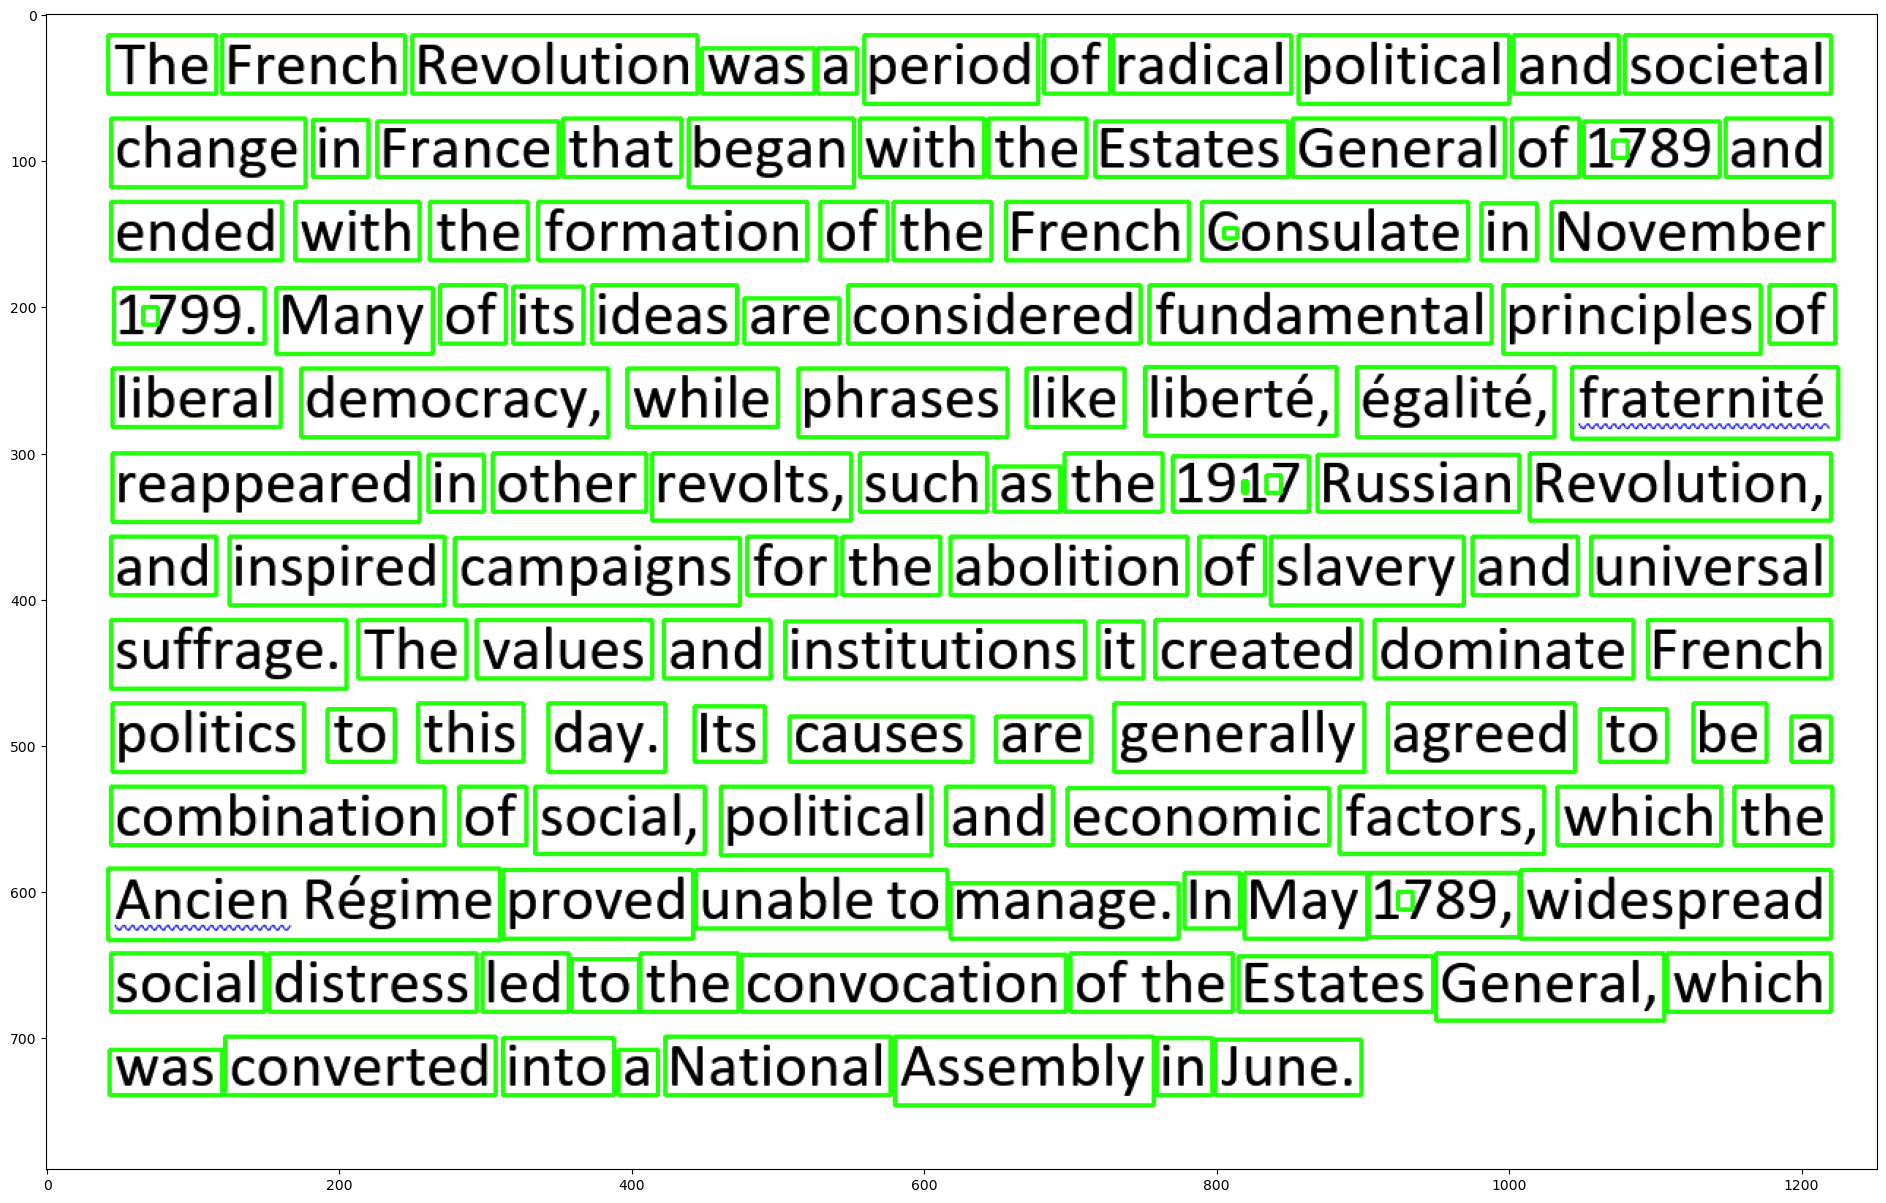

In [21]:
original_image = cv2.imread('french.png')
# convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
# Performing OTSU threshold
ret, threshold_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

rectangular_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 12))

# Applying dilation on the threshold image
dilated_image = cv2.dilate(threshold_image, rectangular_kernel, iterations = 1)
#plt.figure(figsize=(25, 15))
#plt.imshow(dilated_image)
#plt.show()

# Finding contours
contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Creating a copy of the image
copied_image = original_image.copy()

with open("out//recognized-kernel-66-66.txt", "w+") as f:
    f.write("")
f.close()

mask = np.zeros(original_image.shape, np.uint8)
 
# Looping through the identified contours
# Then rectangular part is cropped and passed on to pytesseract
# pytesseract extracts the text inside each contours
# Extracted text is then written into a text file
paragraph = ""
bag_of_words = {}
print(len(contours))
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    # Cropping the text block for giving input to OCR
    cropped = copied_image[y:y + h, x:x + w]
    cv2.rectangle(copied_image, (x, y), (x + w, y + h), (36,255,12), 2)
    
    with open("out//recognized-kernel-66-66.txt", "a") as f:
        # Apply OCR on the cropped image
        text = pytesseract.image_to_string(cropped, lang='eng', config='--oem 3 --psm 1')
        text = text.lower()
        text = re.sub('[^a-z]', ' ', text)
        text = re.sub(r'\s+', '', text)
        
        insideCond = (eyeTrackdf["x"] >= x) & (eyeTrackdf["x"] < x + w) & (eyeTrackdf["y"] >= y) & (eyeTrackdf["y"] < y + h)
        boundFixations = eyeTrackdf[insideCond]
        for fixation in boundFixations:
            try:
                count = bag_of_words[str(text)]
                count += 1
                bag_of_words.update({str(text):count})
            except:
                bag_of_words[str(text)] = 1
        #print(text)
    masked = cv2.drawContours(mask, [cnt], 0, (255, 255, 255), -1)

plt.figure(figsize=(25, 15))
plt.imshow(copied_image, cmap='gray')
plt.show()

In [22]:
del bag_of_words[""]

In [23]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [24]:
setOfstopWords = set(stopwords.words('english'))

In [25]:
nonStopwords = {}

for word,count in bag_of_words.items():   
    if (word not in setOfstopWords):
        nonStopwords[word] = count

In [16]:
sorted(nonStopwords.items(), key=lambda x:x[1], reverse=True)

[('french', 6),
 ('estates', 4),
 ('general', 4),
 ('social', 4),
 ('political', 4),
 ('revolution', 4),
 ('june', 2),
 ('assembly', 2),
 ('national', 2),
 ('converted', 2),
 ('convocation', 2),
 ('distress', 2),
 ('manage', 2),
 ('may', 2),
 ('widespread', 2),
 ('unableto', 2),
 ('proved', 2),
 ('ancienrgime', 2),
 ('economic', 2),
 ('factors', 2),
 ('combination', 2),
 ('causes', 2),
 ('agreed', 2),
 ('generally', 2),
 ('day', 2),
 ('politics', 2),
 ('institutions', 2),
 ('dominate', 2),
 ('created', 2),
 ('values', 2),
 ('suffrage', 2),
 ('campaigns', 2),
 ('universal', 2),
 ('slavery', 2),
 ('abolition', 2),
 ('inspired', 2),
 ('russian', 2),
 ('revolts', 2),
 ('reappeared', 2),
 ('phrases', 2),
 ('democracy', 2),
 ('liberal', 2),
 ('fraternit', 2),
 ('galit', 2),
 ('libert', 2),
 ('many', 2),
 ('principles', 2),
 ('fundamental', 2),
 ('considered', 2),
 ('ideas', 2),
 ('november', 2),
 ('consulate', 2),
 ('formation', 2),
 ('ended', 2),
 ('france', 2),
 ('began', 2),
 ('change', 2

In [17]:
def magnitudeOfVector (vector):
    product = 0
    for component in vector:
        product += component**2
    return math.sqrt(product)

In [18]:
def cosineSimilarity(dictA, dictB):
    intersection = dictA.keys() & dictB.keys()
    dot_product = 0
    for word in intersection:
        dot_product += dictA[word]*dictB[word]
    return dot_product / (magnitudeOfVector(dictA.values())*magnitudeOfVector(dictB.values()))

In [19]:
bag_of_words_1 = bag_of_words.copy()

In [20]:
float(cosineSimilarity(bag_of_words, bag_of_words_1))

1.0

In [21]:
bag_of_words_1 ["of"] = 122
bag_of_words_1 ["which"] = 28
bag_of_words_1 ["general"] = 34
bag_of_words_1["yeah"] = 10

In [22]:
float(cosineSimilarity(bag_of_words, bag_of_words_1))

0.6401820280420839

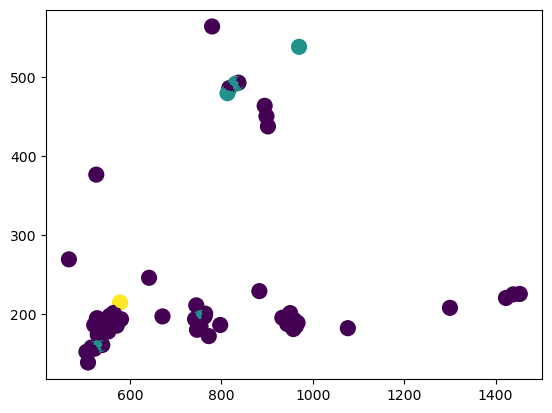

In [36]:
import string
x = eyeTrackdf['x']
y = eyeTrackdf['y']
eyeTrackdf['z'] = [None]*395
for i,count in enumerate(nonStopwords.values()):
    eyeTrackdf['z'][i] = (count-2)/(6-2)

for i,count in enumerate(nonStopwords.values()):
    plt.scatter(x, y, s = 3.14*count**2, c = eyeTrackdf.z, alpha = 1)